<a href="https://colab.research.google.com/github/benigmatic/Machine-learning-and-Data-vizualization/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries: pandas, numpy, matplotlib (set %matplotlib inline), matplotlib’s pyplot, seaborn, missingno, scipy’s stats, sklearn



In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
# for machine learning
import sklearn
import missingno as msno

Import the data to a dataframe and show how many rows and columns does it have

In [ ]:
df = pd.read_csv('hrdata.csv')
df.shape

(21287, 18)

The describe method of dataframe to see some summary statistics of the numerical columns

In [ ]:
df.describe()

,Unnamed: 0,rec_num,enrollee_id,city_development_index,training_hours,target,city_development_matrics
count,21287.000000,21287.000000,21287.000000,21287.000000,21287.000000,19158.000000,21287.000000
mean,10643.000000,10644.000000,16873.983652,0.828462,65.328510,0.249348,8.284615
std,6145.171926,6145.171926,9612.131237,0.123537,60.075201,0.432647,1.235365
min,0.000000,1.000000,1.000000,0.448000,1.000000,0.000000,4.480000
25%,5321.500000,5322.500000,8554.500000,0.739000,23.000000,0.000000,7.390000
50%,10643.000000,10644.000000,16967.000000,0.903000,47.000000,0.000000,9.030000
75%,15964.500000,15965.500000,25161.500000,0.920000,88.000000,0.000000,9.200000
max,21286.000000,21287.000000,33380.000000,0.949000,336.000000,1.000000,9.490000


Target column seems to have a lot of missing values. And it look like it is categorical data. Some columns like enrollee_id, rec_num a not continuous, scatter plot or something similar would fit best to describe the data. city_development_index and training_hours are continuous data

4. 
    Show the top 5 rows of the data frame



In [ ]:
df.head(5)

,Unnamed: 0,rec_num,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,state,city_development_matrics
0,0,1,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,CA,9.20
1,1,2,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,CA,7.76
2,2,3,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,CA,6.24
3,3,4,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,CA,7.89
4,4,5,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,CA,7.67


5. 
    List all the numerical columns



In [ ]:
numerical_columns = df.select_dtypes(include = [np.number])
numerical_columns.columns

Index(['Unnamed: 0', 'rec_num', 'enrollee_id', 'city_development_index',
       'training_hours', 'target', 'city_development_matrics'],
      dtype='object')

6. List all the categorial columns

In [ ]:
categorical_columns = df.select_dtypes(include = [object])

categorical_columns.columns

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job', 'state'],
      dtype='object')


 7.    Examine missing values

7.1. Show a list with column wise count of missing values and display the list in count wise descending order


In [ ]:
missingdf = df.isnull().sum().to_frame("null")
missingdf.sort_values("null", inplace = True, ascending = False)
for index, row in missingdf.iterrows():
    print(index, row[0])

company_type 6774
company_size 6560
gender 5016
major_discipline 3125
target 2129
education_level 512
last_new_job 463
enrolled_university 417
experience 70
state 0
training_hours 0
Unnamed: 0 0
rec_num 0
relevent_experience 0
city_development_index 0
city 0
enrollee_id 0
city_development_matrics 0


7.2. Show a list with column wise percentage of missing values and display the list in percentage wise descending order

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing_df = percent_missing.to_frame("null")
percent_missing_df.sort_values('null', inplace=True, ascending =False)
for index, row in percent_missing_df.iterrows():
    print(index, row[0])

company_type 31.822238925165593
company_size 30.816930520975244
gender 23.563677361770093
major_discipline 14.680321322873114
target 10.001409310846995
education_level 2.405223845539531
last_new_job 2.1750364071968806
enrolled_university 1.9589420773241886
experience 0.3288391976323578
state 0.0
training_hours 0.0
Unnamed: 0 0.0
rec_num 0.0
relevent_experience 0.0
city_development_index 0.0
city 0.0
enrollee_id 0.0
city_development_matrics 0.0


7.3. Display a bar plot to visualize only the columns with missing values and their count. The plot should display from less missing value columns in the left and then more missing value columns to the right side of the plot


<function matplotlib.pyplot.show>

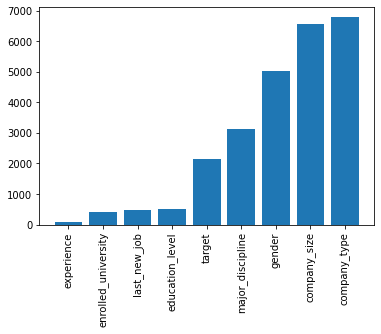

In [ ]:
missingdf.sort_values("null", inplace = True, ascending = True)
missingdf = missingdf[missingdf.values > 0]
y = missingdf.index
X = missingdf.values.flatten()
plt.bar(y,X)
plt.xticks(rotation=90)
plt.show

7.4. Use missingno’s bar plot, matrix plot with 200 sample, and heatmap. 

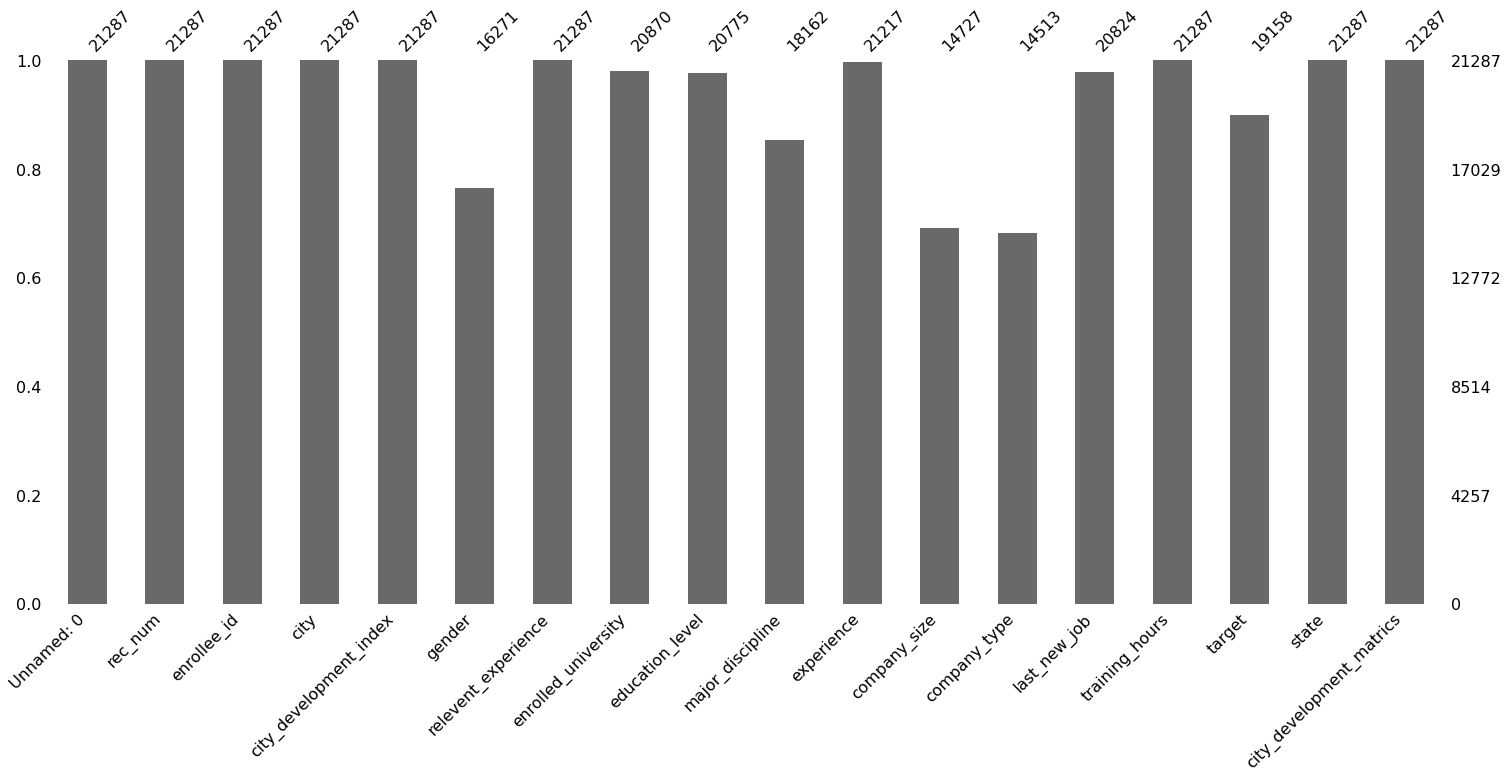

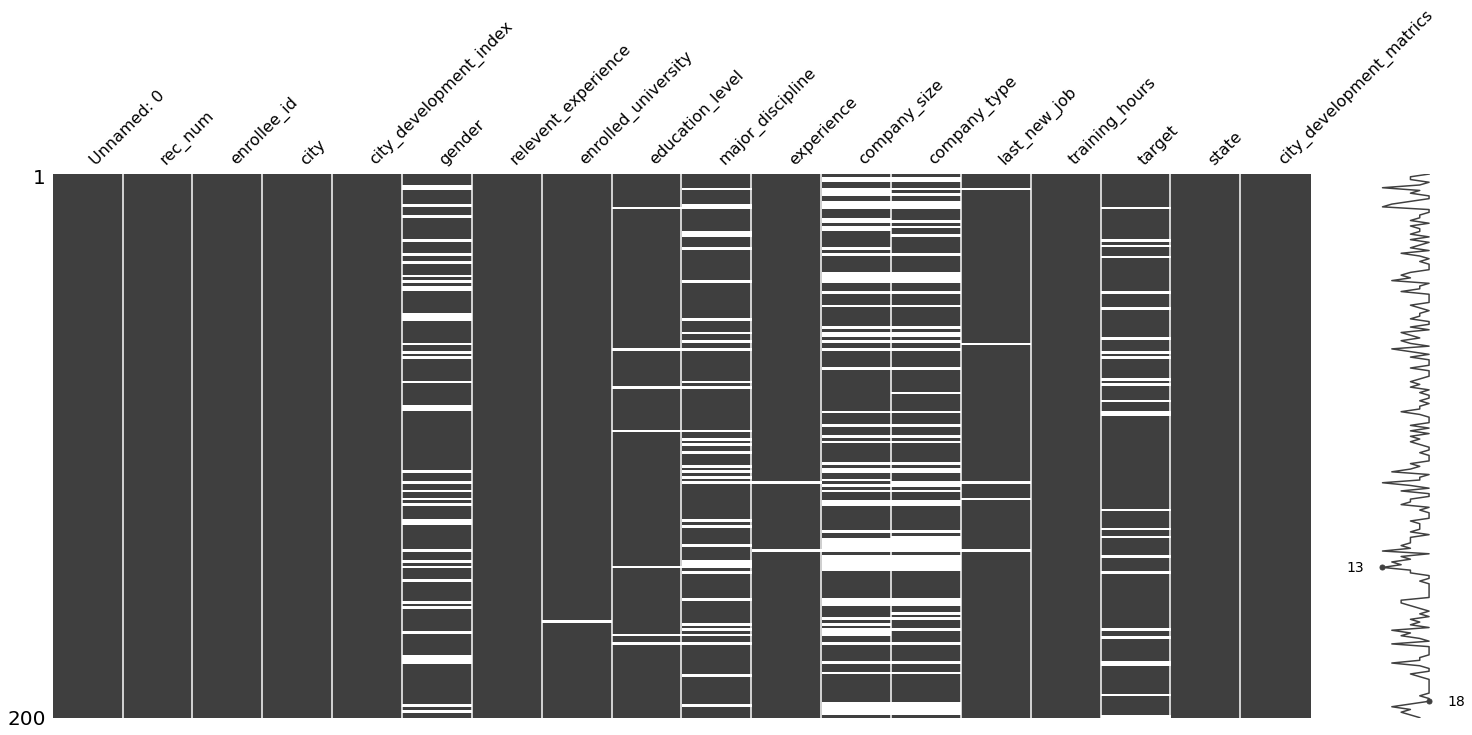

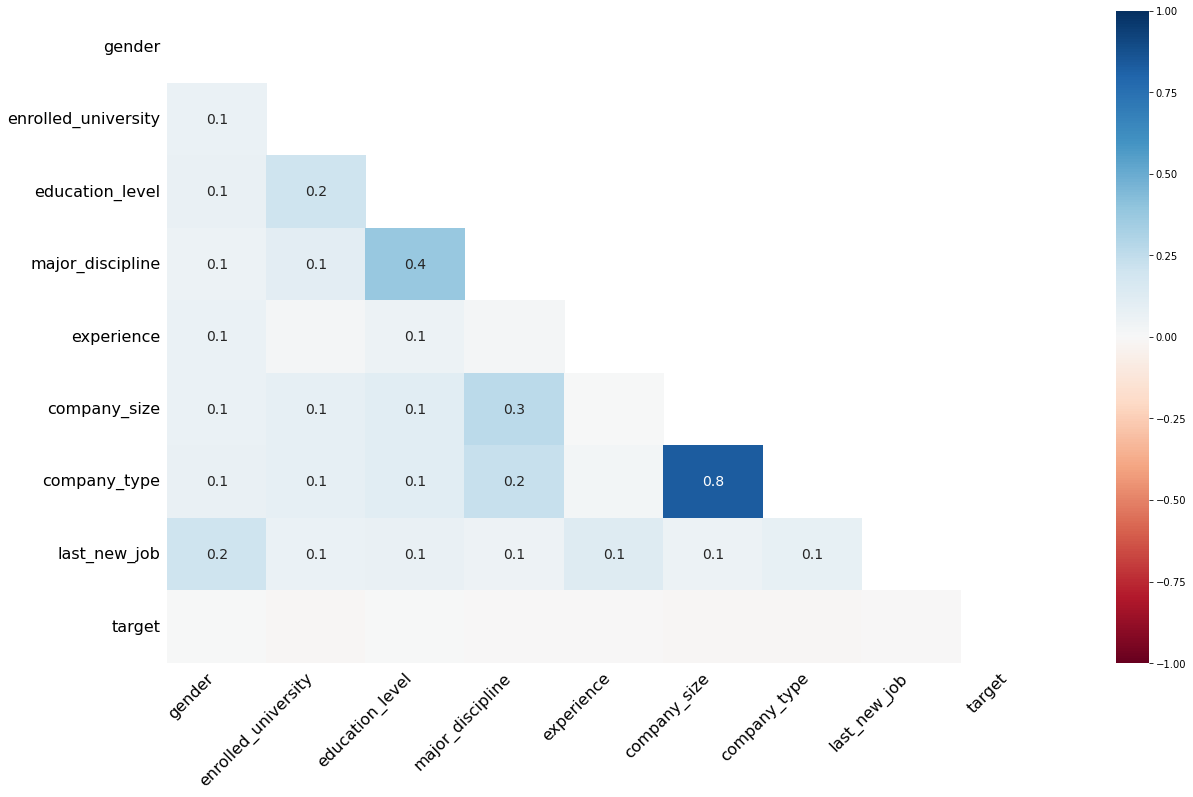

In [ ]:
msno.bar(df)
msno.matrix(df.sample(200))
msno.heatmap(df)


   8.  Understanding Categorical attributes

8.1 Use seaborn bar plot for the categorical feature to see different values and count 8.2 Use seaborn countplot for the categorical feature against the values of the target 8.3 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


'The gender column has a lot of missing values, so there is a considerable other column,\nthat might change the actual picture of gender representation. City colums seems to be a very various \ncolumn'

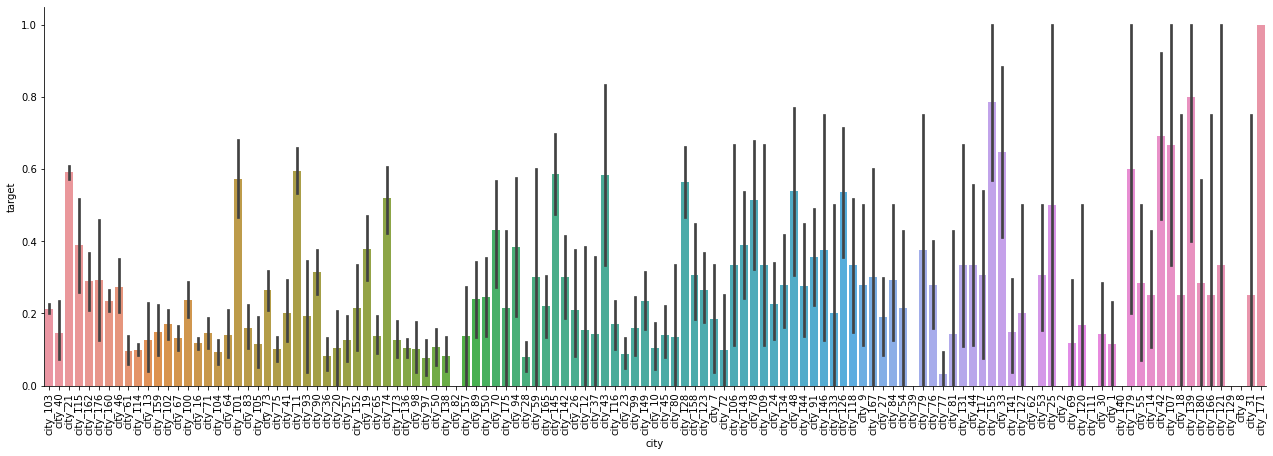

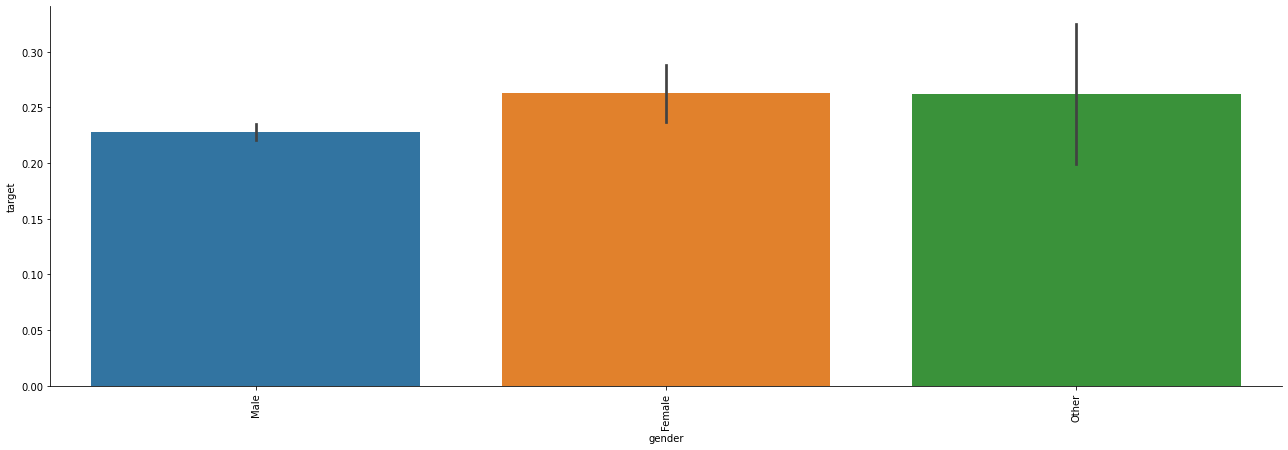

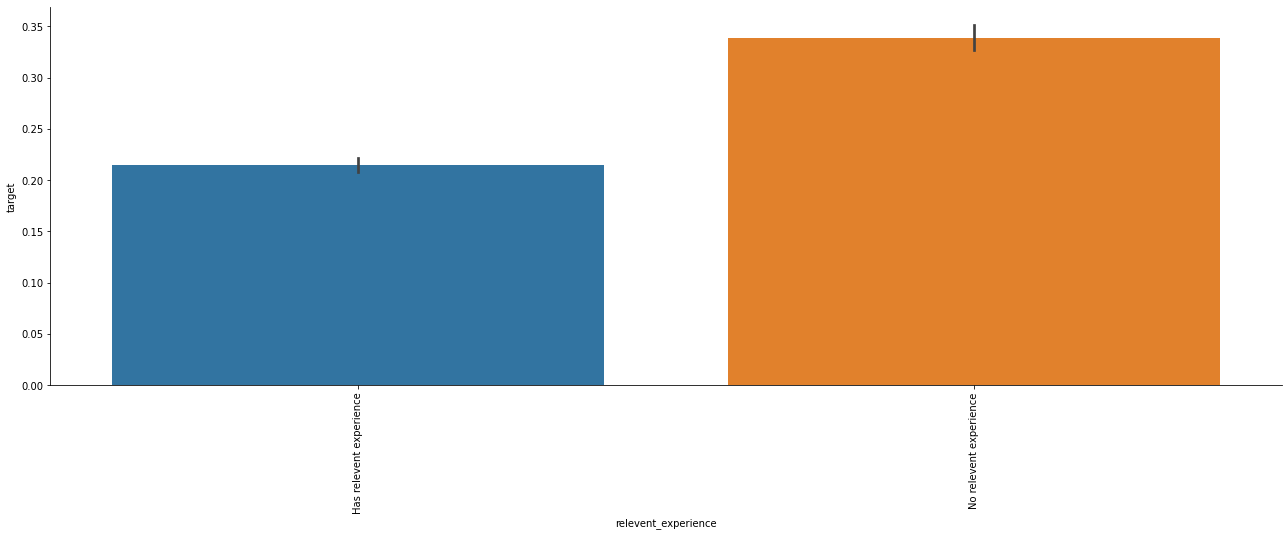

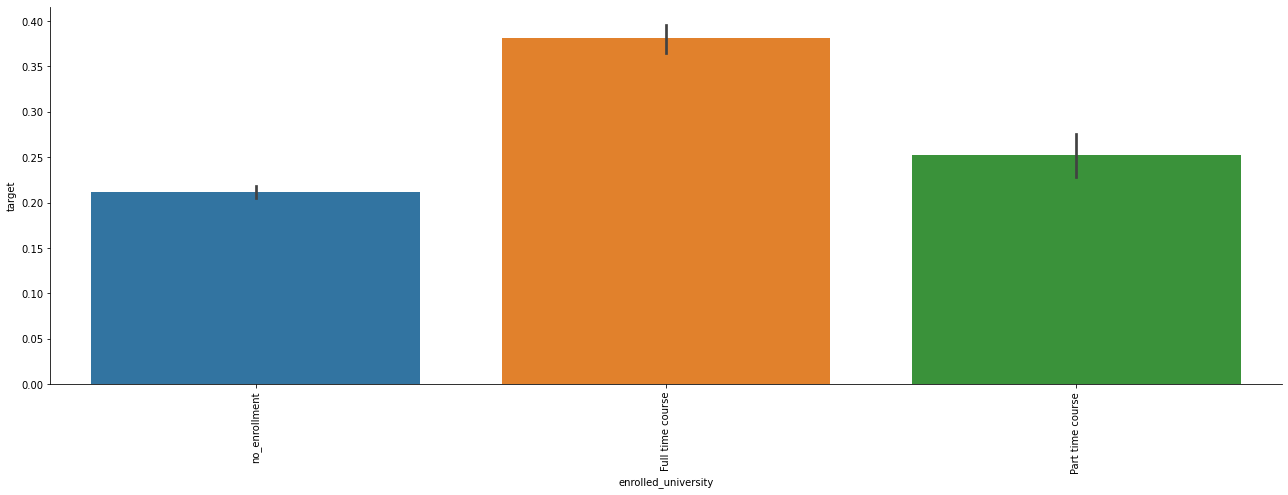

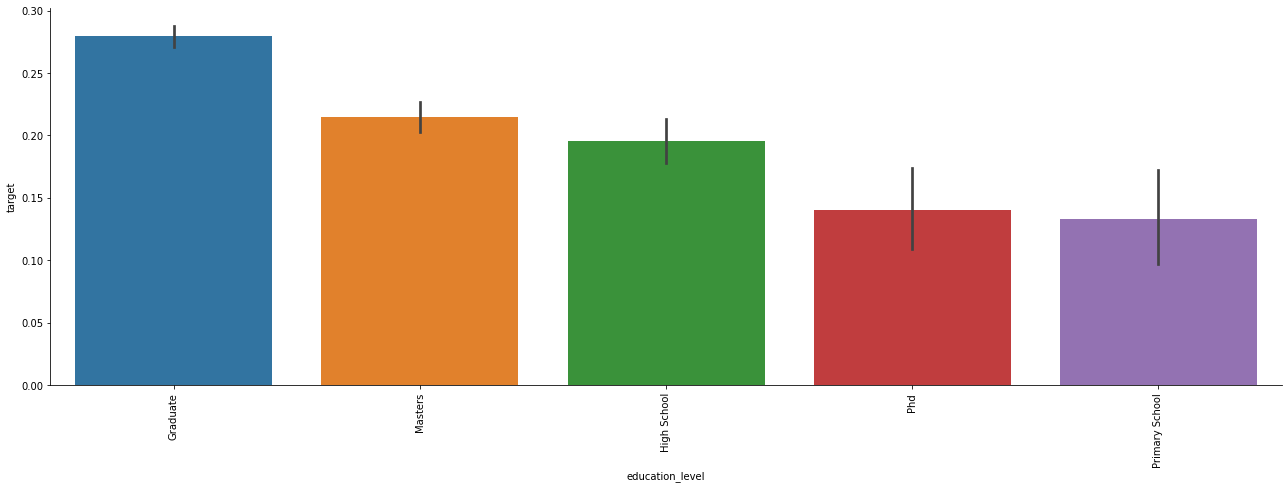

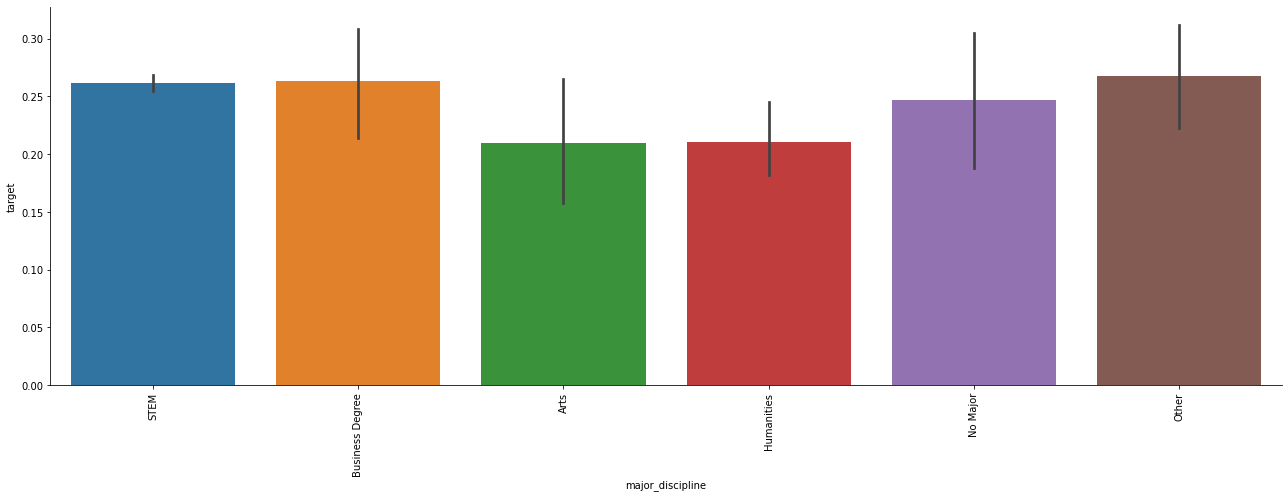

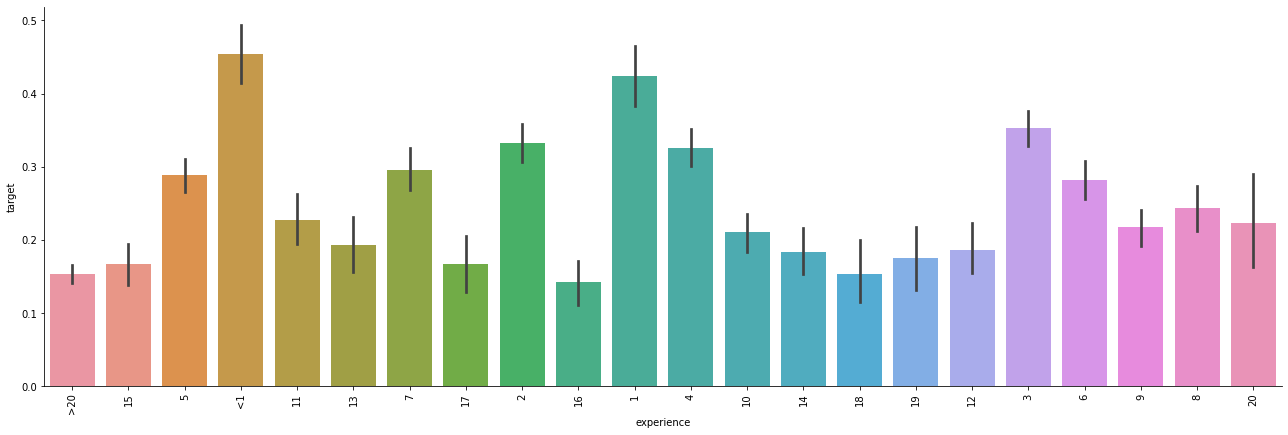

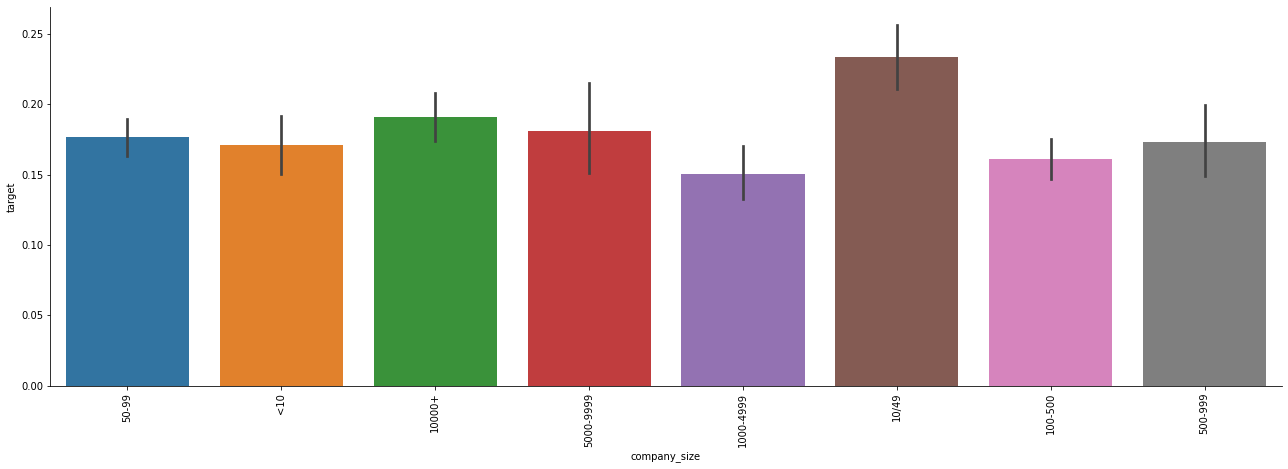

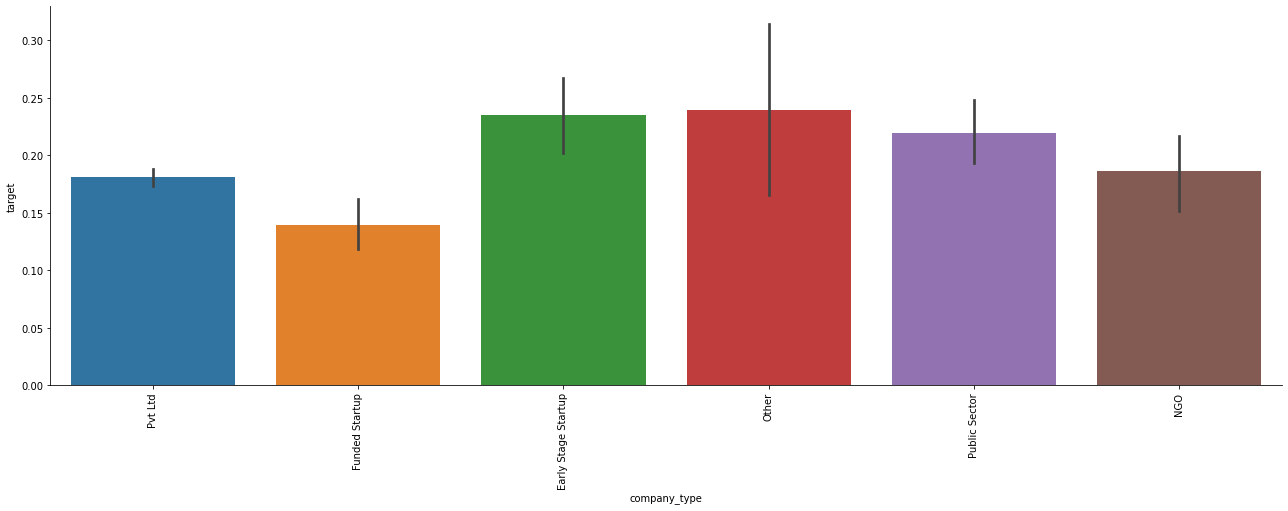

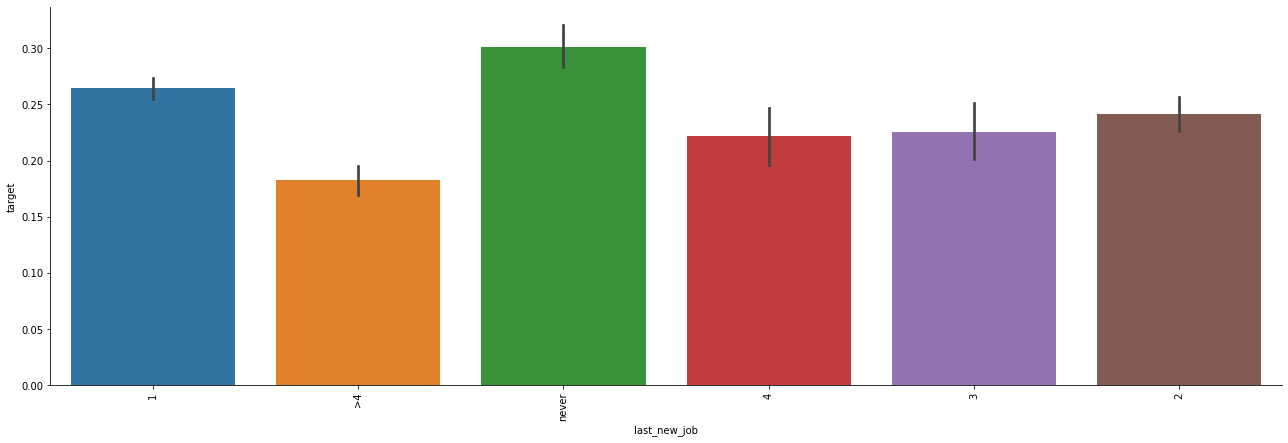

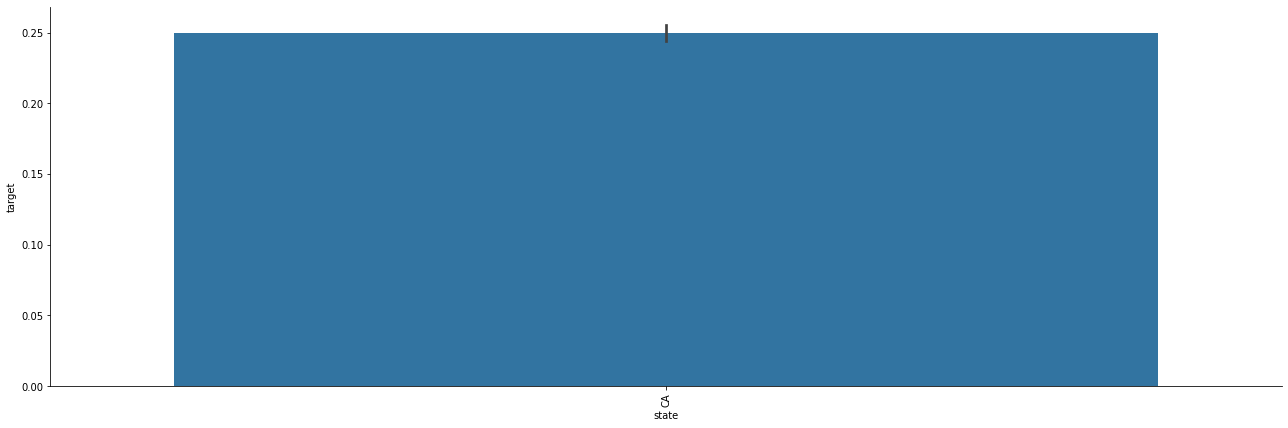

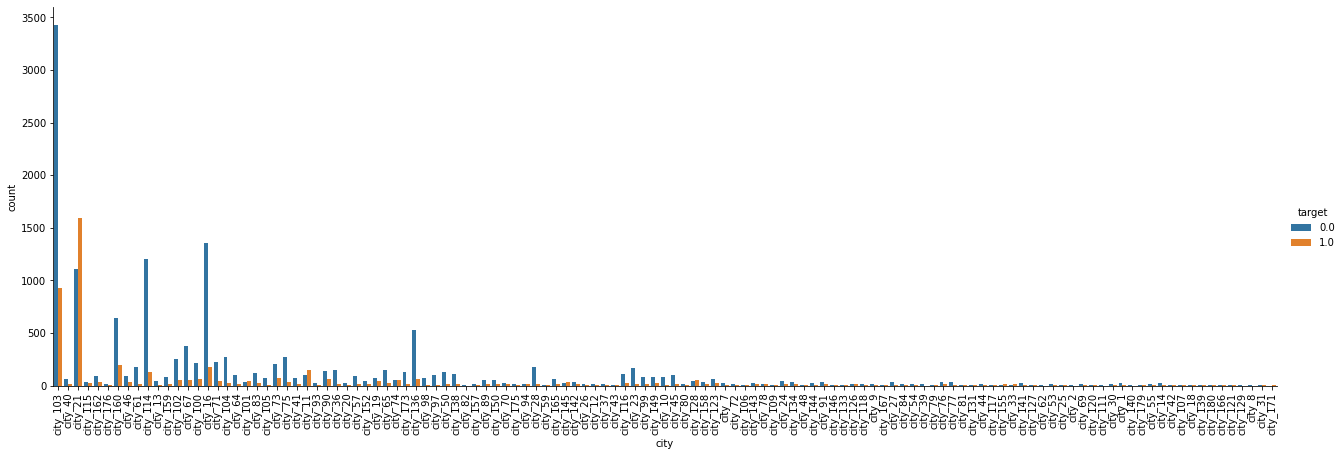

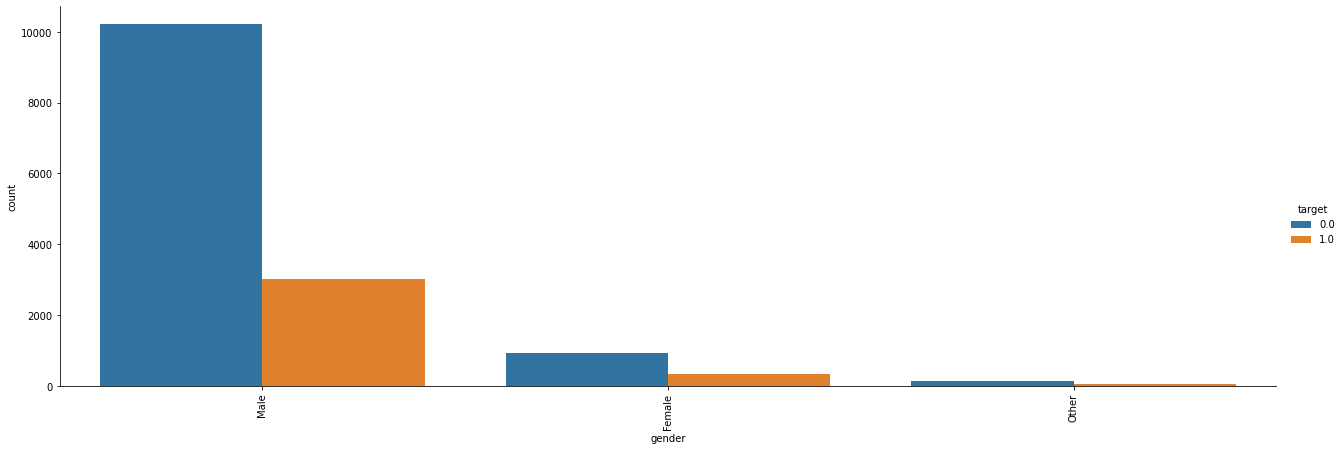

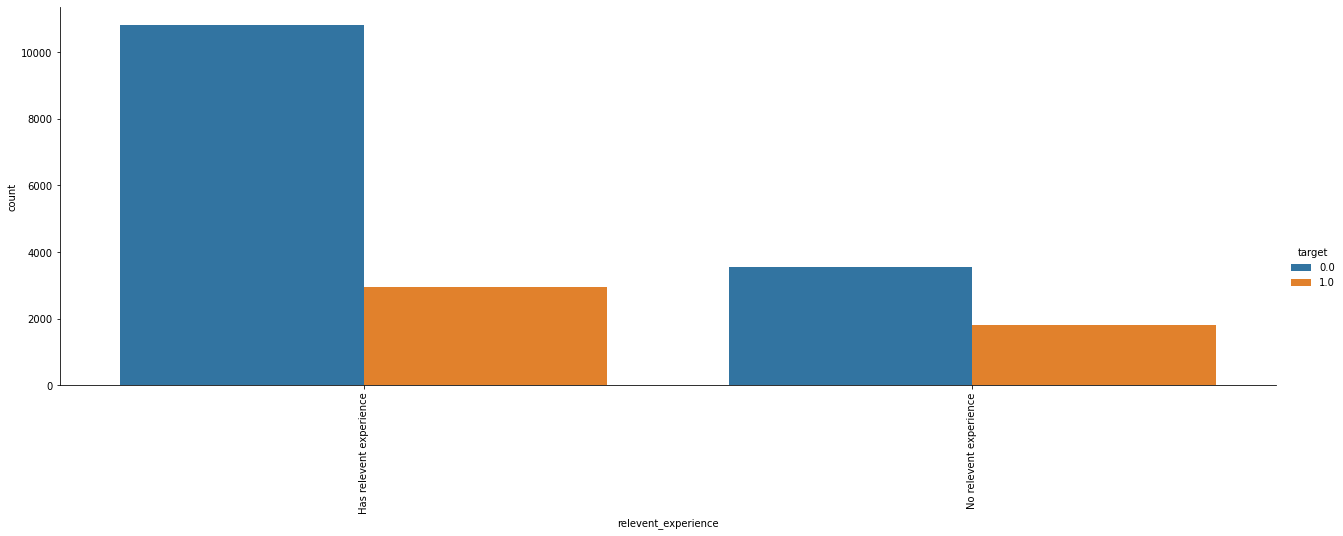

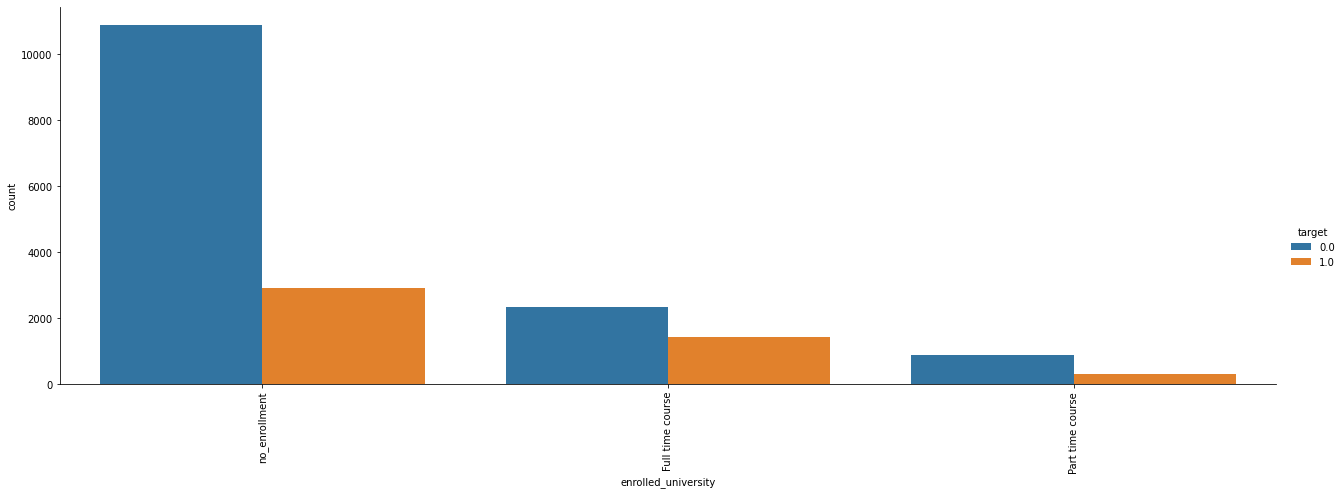

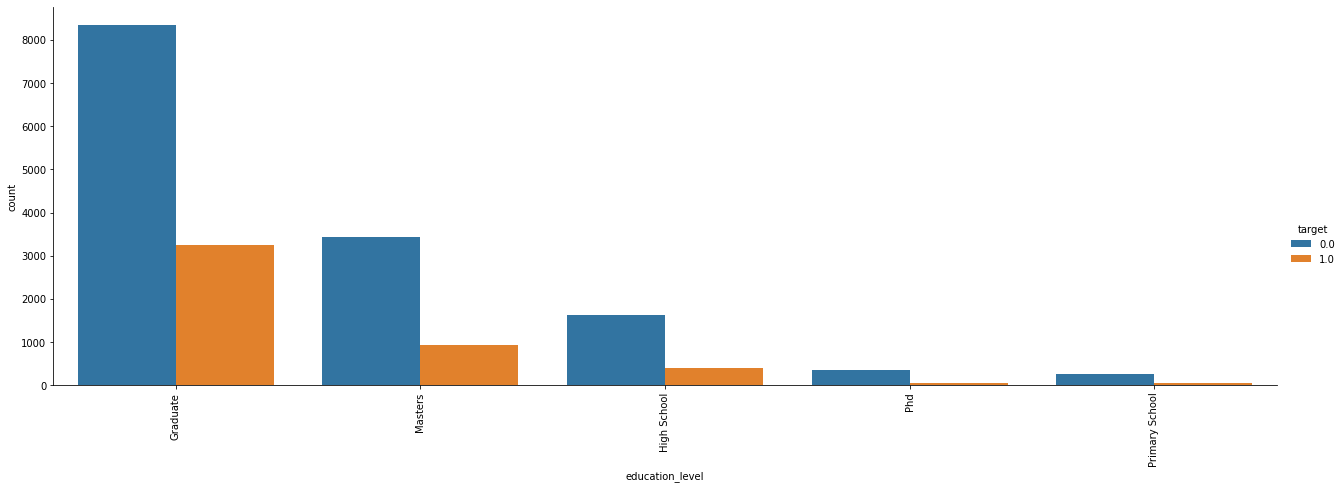

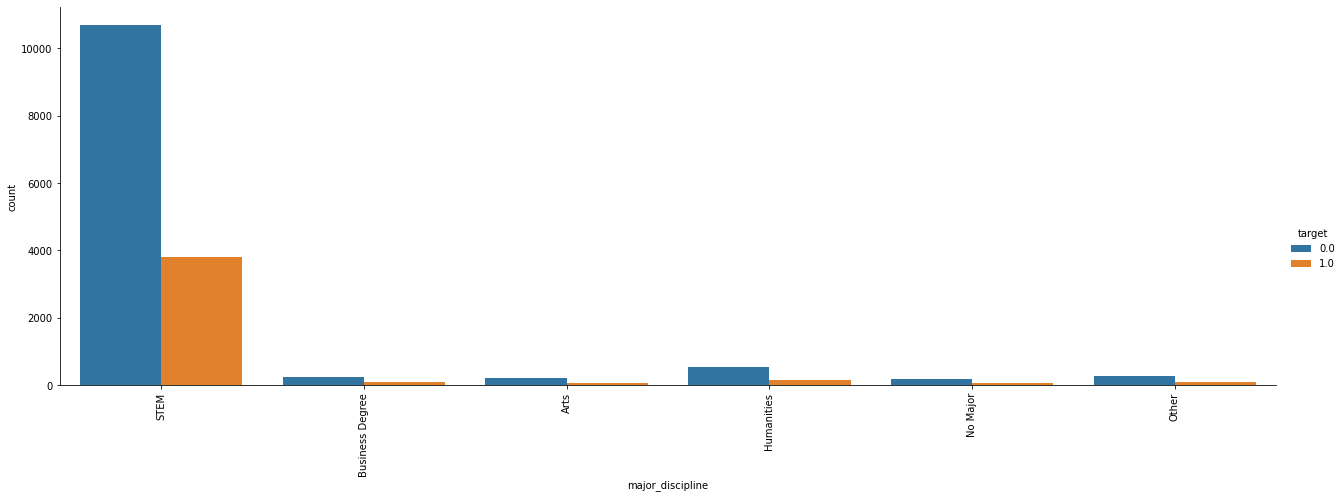

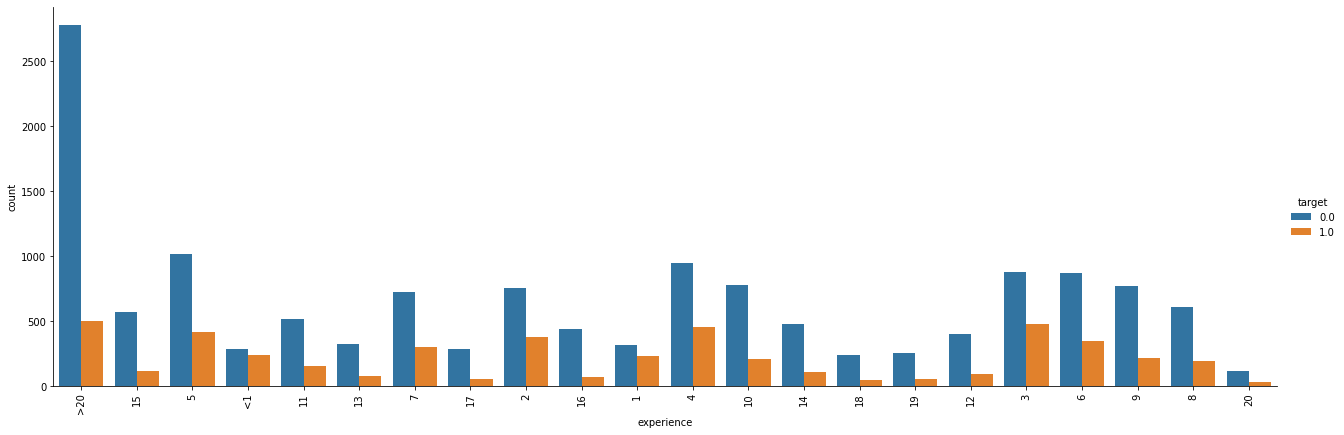

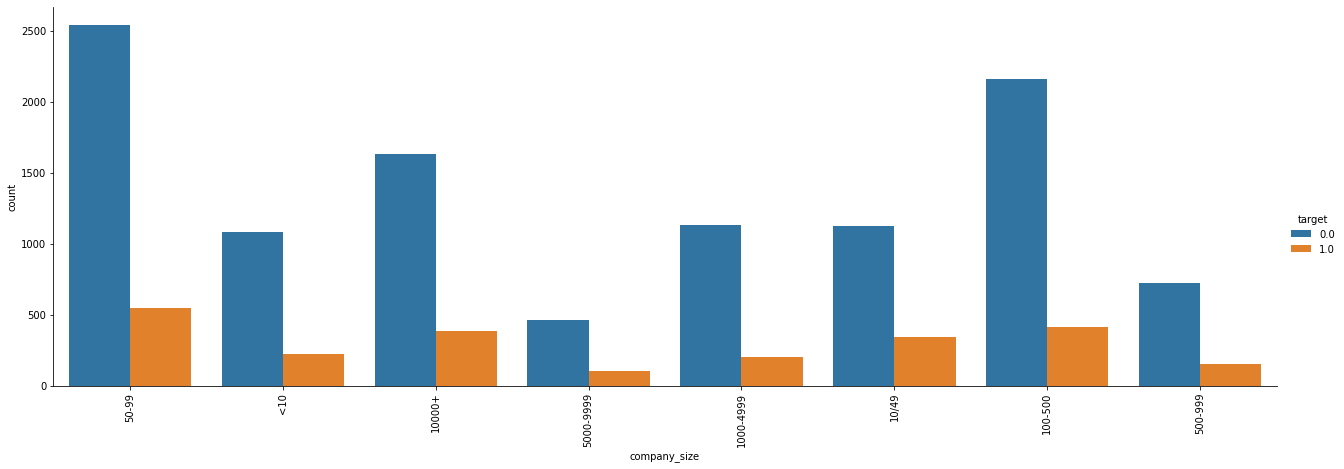

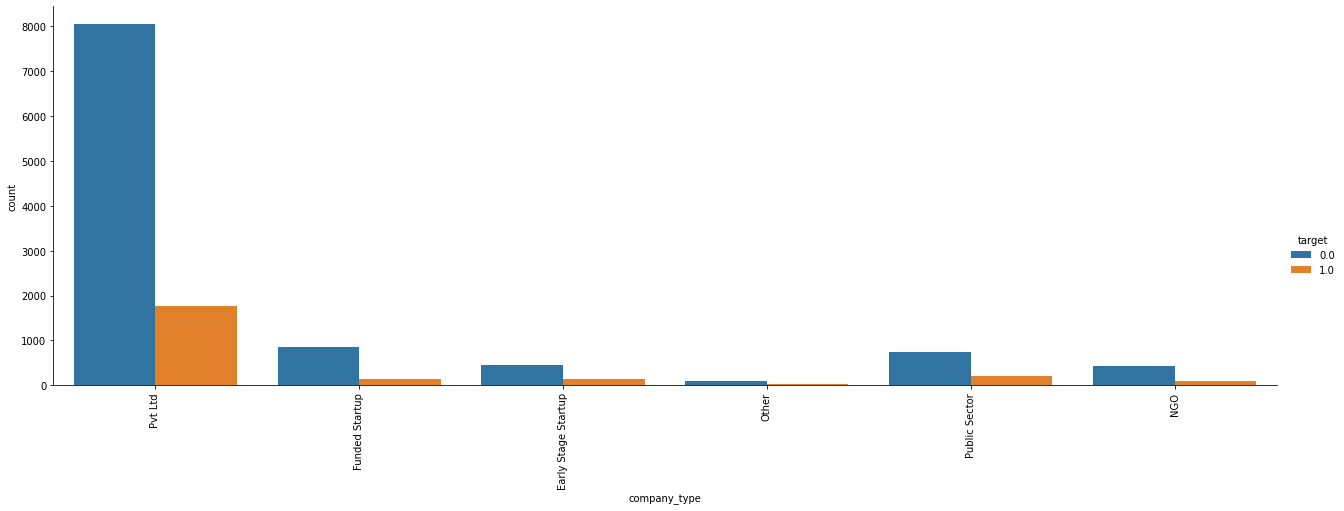

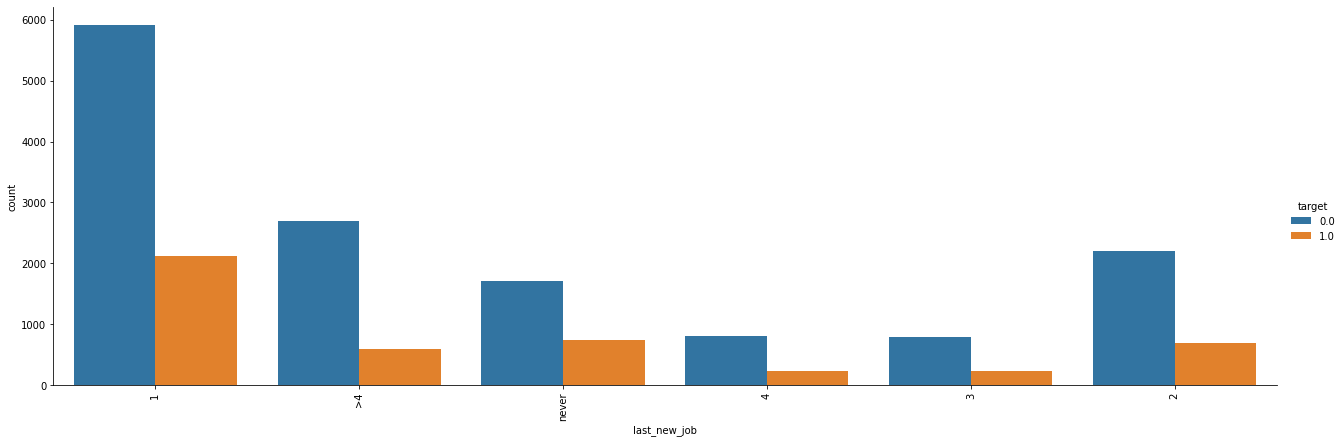

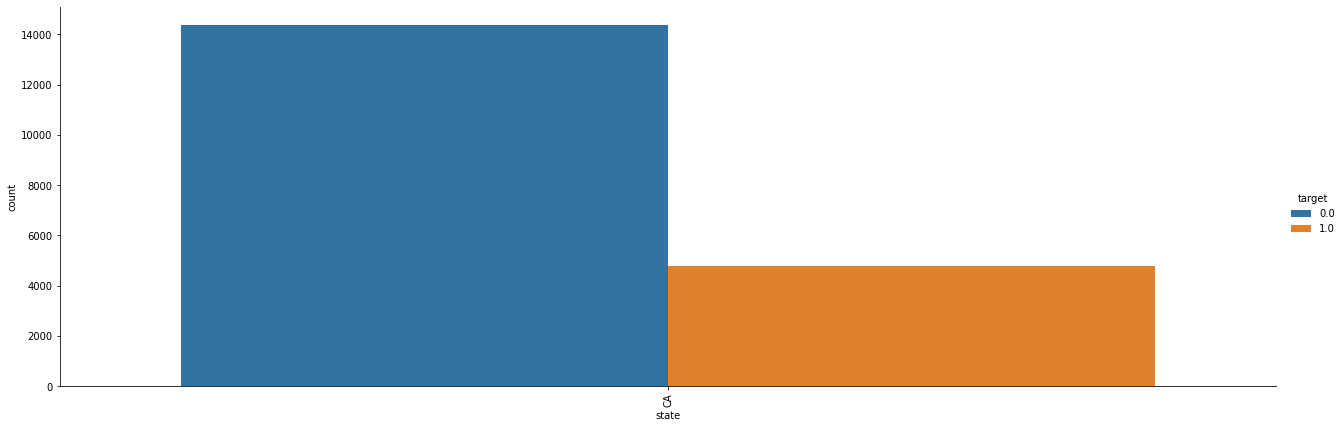

In [ ]:
for col in categorical_columns:
    sns.catplot(data = df, x = col, y= 'target', kind="bar", height=6, aspect=3)
    plt.xticks(rotation=90)
for col in categorical_columns:
    sns.catplot(data = df, x = col, hue = "target", kind="count",height=6, aspect=3)
    plt.xticks(rotation=90)
"""The gender column has a lot of missing values, so there is a considerable other column,
that might change the actual picture of gender representation. City colums seems to be a very various 
column"""

**9. Understanding Numerical attributes**

1. For each numerical features, perform the following:
2. Plot their distributions using groupby histogram


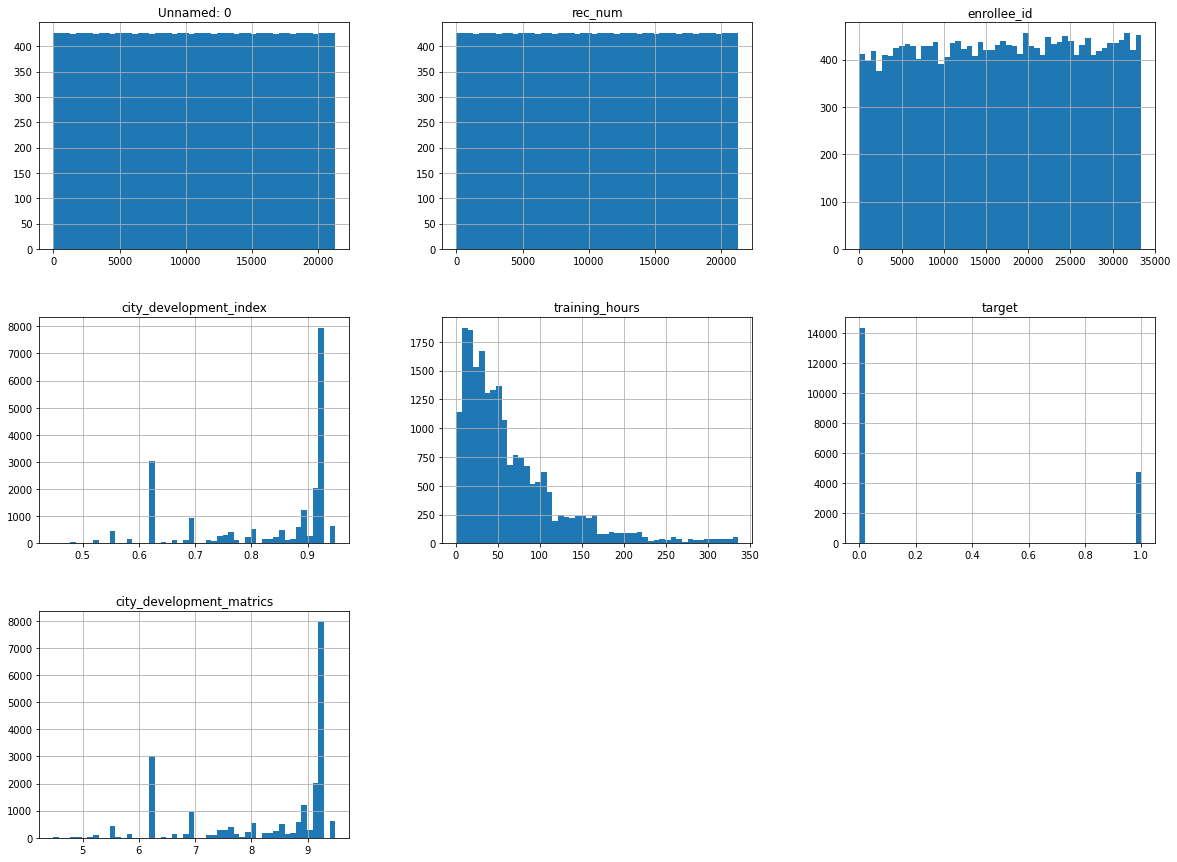

In [ ]:

df.hist(bins = 50, figsize=(20,15))
plt.show()

3. Plot the distribution using seaborn distplot


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


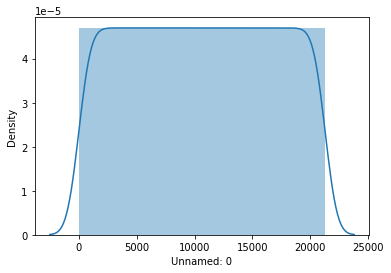

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


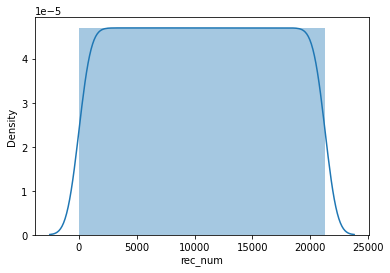

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


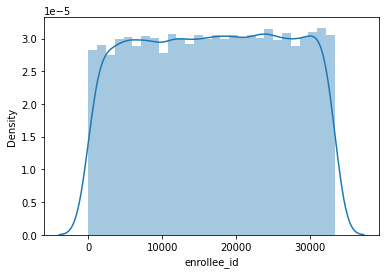

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


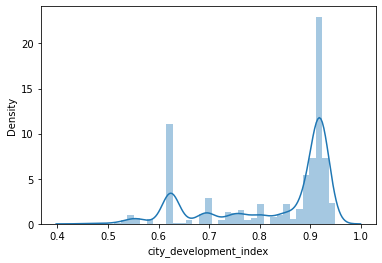

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


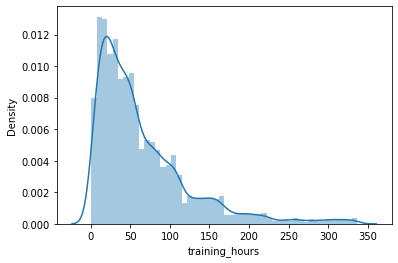

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


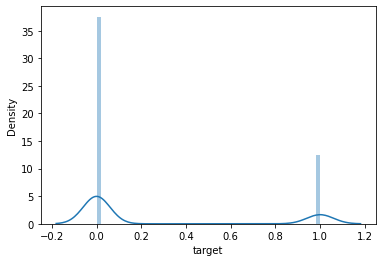

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


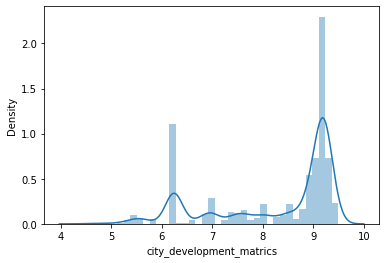

In [ ]:
for num in numerical_columns:    
    sns.distplot(df[num])
    plt.show()
  

10. Correlation: 

  1.  For the numerical attributes, use heatmap to show the correlation

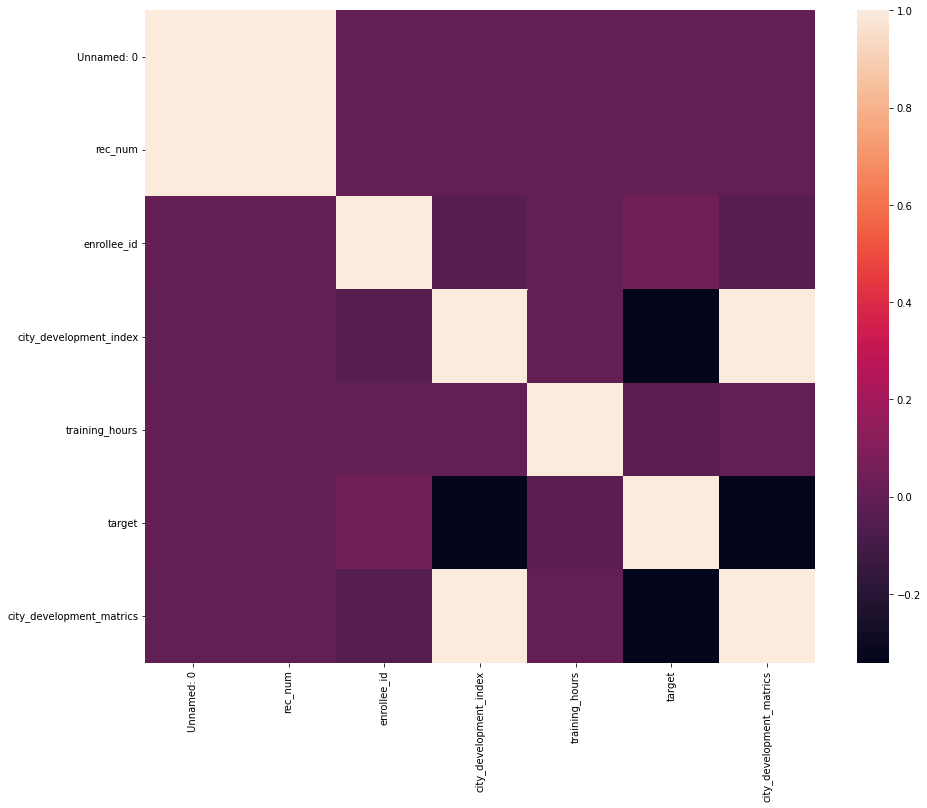

In [ ]:
num_features = df.select_dtypes(include = [np.number])
correlation = num_features.corr()
plt.figure(figsize = (15, 12))
sns.heatmap(correlation)

3. Show scatter plots between columns to show the relationships with the target

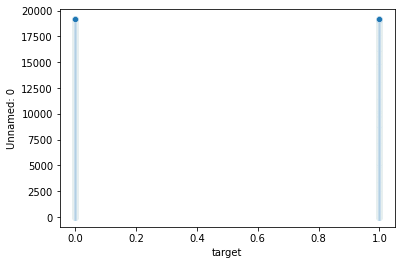

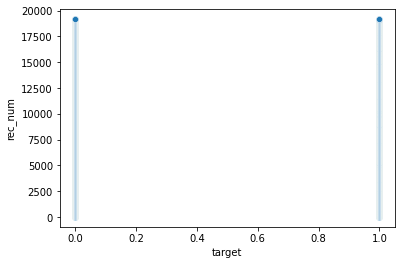

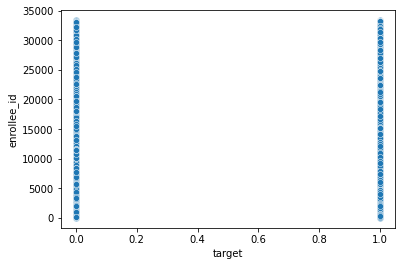

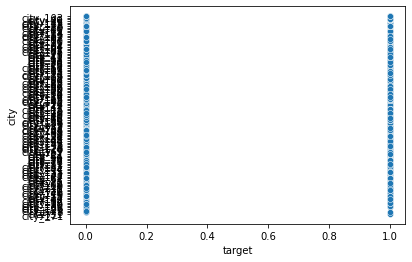

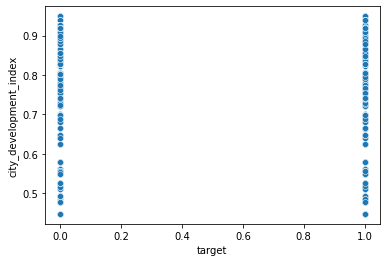

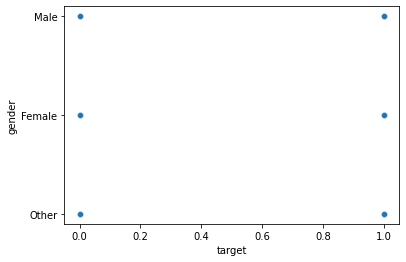

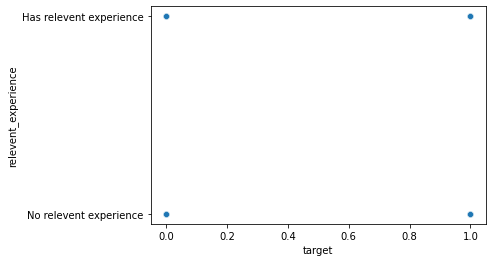

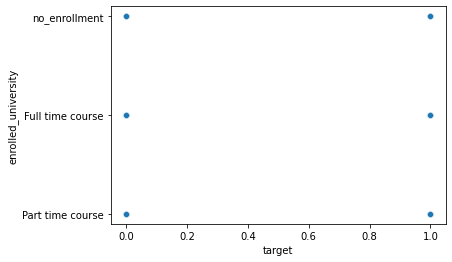

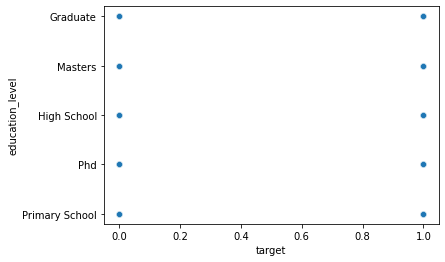

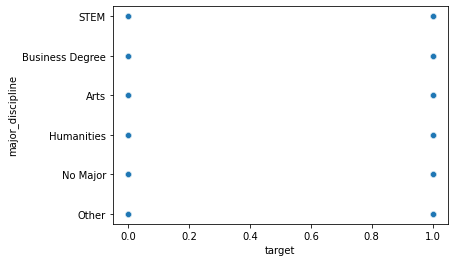

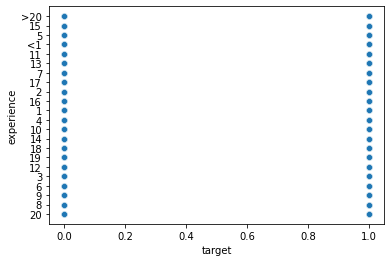

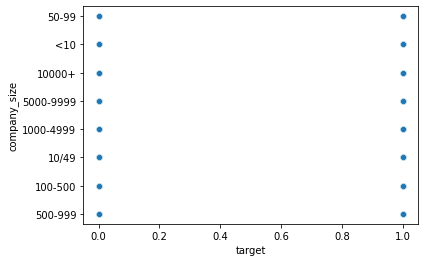

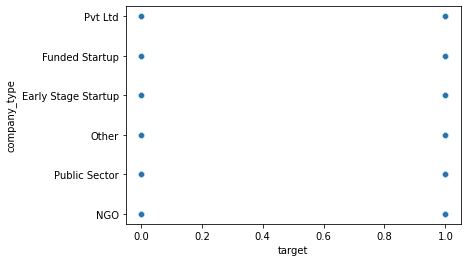

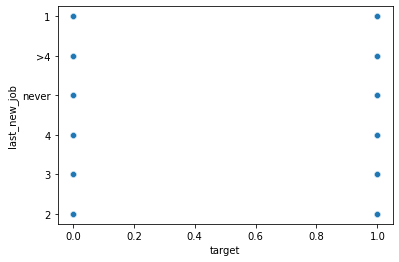

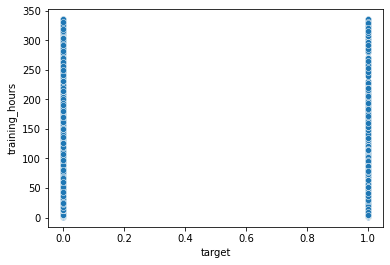

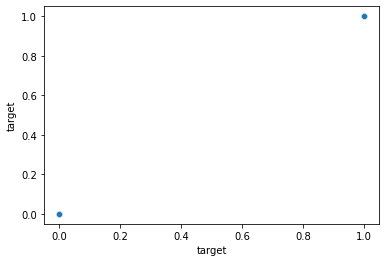

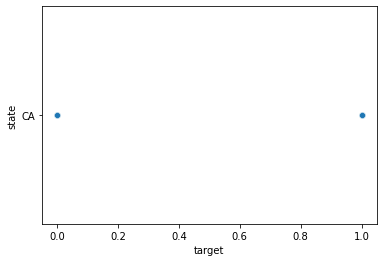

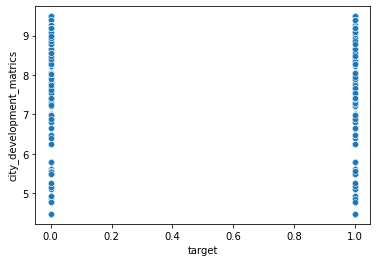

In [ ]:
for col in df.columns:
  sns.scatterplot(y=col, x='target', data = df)
  plt.show()

11. Use boxplot or any other strategies to find outliers

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

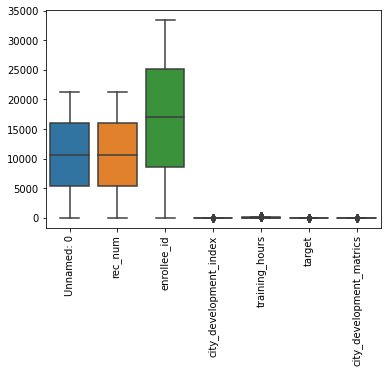

In [ ]:
sns.boxplot(data = df)
plt.xticks(rotation=90)